[The Human Mortality Database](https://www.mortality.org/hmd/RUS/STATS/E0per.txt) *(mortality.org)*<br />
[ЕМИСС](https://www.fedstat.ru/indicator/31293) - Единая межведомственная информационно-статистическая система) *(fedstat.ru)*<br />
"[Продолжительность жизни в субъектах Российской Федерации](https://ru.wikipedia.org/wiki/Продолжительность_жизни_в_субъектах_Российской_Федерации)" *(wiki)*<br />
[Файл:Ожидаемая продолжительность жизни, Россия, 1990-2009.png](https://ru.wikipedia.org/wiki/Файл:Ожидаемая_продолжительность_жизни,_Россия,_1990-2009.png) *в русскоязычной Википедии*<br />
[Category:Life expectancy charts for Russia](https://commons.wikimedia.org/wiki/Category:Life_expectancy_charts_for_Russia) *на Викискладе*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import namedtuple

In [2]:
pd.options.display.max_rows = 50

HOR_LINES = [1998, 2000, 2019]
DESTINATION_OUTPUT = 'show'
LANG = 'ru'

In [3]:
# load info from Rosstat
df_rosstat = pd.read_excel('data/Rosstat_by_year_and_gender.xls', skiprows=2)

print(df_rosstat.shape)
df_rosstat

(3, 35)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Российская Федерация,Женщины,все население,74.3,74.2,73.7,71.8,71.1,71.6,72.4,...,75.86,76.30,76.47,76.71,77.06,77.64,77.82,78.17,76.43,74.51
1,Российская Федерация,Мужчины,все население,63.7,63.4,61.9,58.8,57.4,58.1,59.6,...,64.56,65.13,65.29,65.92,66.50,67.51,67.75,68.24,66.49,65.51
2,Российская Федерация,Оба пола,все население,69.2,68.9,67.8,65.0,63.9,64.5,65.8,...,70.24,70.76,70.93,71.39,71.87,72.70,72.91,73.34,71.54,70.06


In [4]:
# drop redundant columns
df_rosstat.drop(['Unnamed: 0', 'Unnamed: 2'], axis='columns', inplace=True)

# convert gender column to index
df_rosstat.set_index('Unnamed: 1', inplace=True)

# for brevityh of display remove name of index column.
df_rosstat.index.name = ''

print(df_rosstat.shape)
df_rosstat

(3, 32)


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
,,,,,,,,,,,,,,,,,,,,,
Женщины,74.3,74.2,73.7,71.8,71.1,71.6,72.4,72.8,73.1,72.4,...,75.86,76.30,76.47,76.71,77.06,77.64,77.82,78.17,76.43,74.51
Мужчины,63.7,63.4,61.9,58.8,57.4,58.1,59.6,60.9,61.2,59.9,...,64.56,65.13,65.29,65.92,66.50,67.51,67.75,68.24,66.49,65.51
Оба пола,69.2,68.9,67.8,65.0,63.9,64.5,65.8,66.7,67.1,65.9,...,70.24,70.76,70.93,71.39,71.87,72.70,72.91,73.34,71.54,70.06


In [5]:
# transform dataframe to more convenient form
df_rosstat = df_rosstat.rename(index={
    'Женщины': 'females',
    'Мужчины': 'males',
    'Оба пола': 'overall'
}).reindex(['females', 'overall', 'males', ])

df_rosstat = df_rosstat.transpose()
df_rosstat.index = df_rosstat.index.map(int)
df_rosstat

,females,overall,males
1990,74.30,69.20,63.70
1991,74.20,68.90,63.40
1992,73.70,67.80,61.90
1993,71.80,65.00,58.80
1994,71.10,63.90,57.40
1995,71.60,64.50,58.10
1996,72.40,65.80,59.60
1997,72.80,66.70,60.90
1998,73.10,67.10,61.20
1999,72.40,65.90,59.90


<br />
<br />

In [6]:
dd_eng_to_rus = {
    'females': 'женщины',
    'overall': 'всё население',
    'males': 'мужчины'
}

In [7]:
def output_graph(plt, destination=DESTINATION_OUTPUT, file_name='chart.png'):
    if destination == 'file':
        plt.savefig('output/'+file_name, bbox_inches='tight', facecolor='white', pad_inches=0.05)
        print('Data has written to file')
    else:
        plt.show()

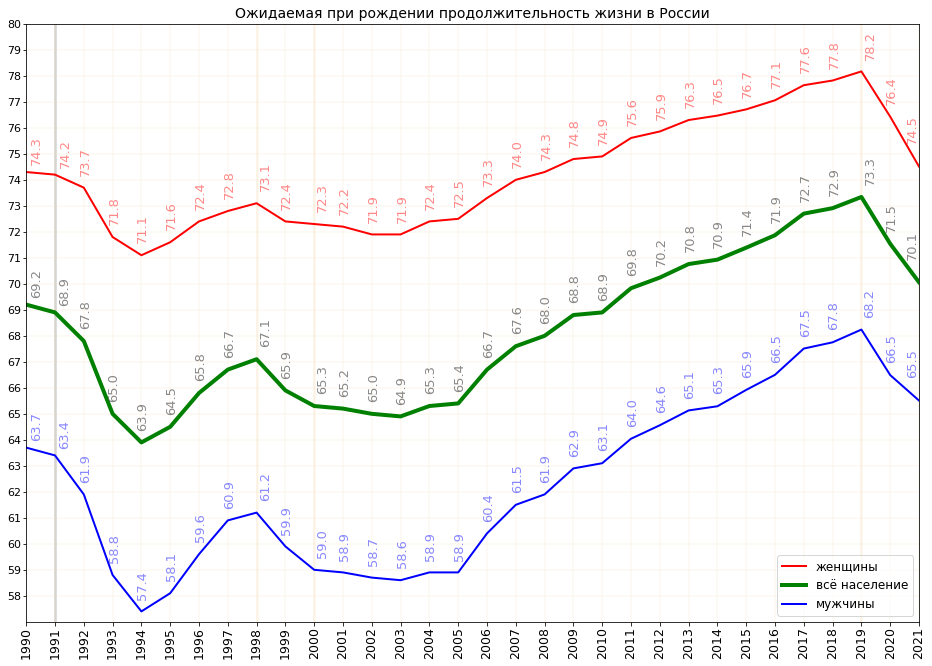

In [8]:
def create_chart_annotated_russia(df, figure_size=(16, 11), title='title', hor_lines=HOR_LINES,
                                 lang='en', destination=DESTINATION_OUTPUT, file_name='chart.png'):
    plt.rcParams['figure.figsize'] = figure_size
    
    # set where ticks and labels will be shown around charts
    plt.tick_params(axis='y', which='both', pad=1.5)
    plt.tick_params(axis='x', which='both', pad=1.5)
    
    year_min = df.index[0]
    year_max = df.index[-1]

    plt.title(title, fontsize=14)
    
    plt.xlim(year_min, year_max)
    plt.grid(color='wheat', linewidth=0.25)

    labels_x = range(year_min, year_max+1)
    labels_y = range(58, 81)
    plt.ylim(57, 80)
    plt.xticks(labels_x, fontsize=12.5, rotation='vertical')
    plt.yticks(labels_y, fontsize=11)
    
    for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                            ['red', 'green', 'blue'],
                                                            ['#FF6060', '#606060',  '#6060FF'],
                                                            [2, 4, 2]):
        plt.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width,
                 label=dd_eng_to_rus[row_name] if lang=='ru' else row_name)
        for x,y in zip(df.index, df[row_name]):
            label = "{:.1f}".format(y)            
            plt.annotate(label, # this is the text
                         (x+0.12,y) if (x in df.index[0:2])
                             else (x+0.3,y+0.2) if x in [1998, 2000, 2019]
                             else (x,y+0.6) if x==year_max
                             else (x+0.05,y+0.2), # these are the coordinates to position the label
                         textcoords="offset points",                                                          # how to position the text
                         xytext=(0,10),                                                                       # distance from text to points (x,y)
                         ha='left' if (x in df.index[0:2]) else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                         color=color_text,
                         alpha=0.75,
                         rotation=90,
                         fontsize=13)
    
    # for year in range(year_min - year_min % 10 + 10, year_max, 10):
    #     plt.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)
        
    plt.axvline(x=1991, color='lightgrey', linewidth=2.5, zorder=0)
    for year in [1998, 2000, 2019]:
        plt.axvline(x=year, color='wheat', linewidth=2.5, alpha=0.25, zorder=0)    

    plt.legend(loc='lower right', fontsize=12)
    
    output_graph(plt, destination=destination, file_name=file_name)


lang = LANG
if lang == 'ru':
    create_chart_annotated_russia(df_rosstat, title='Ожидаемая при рождении продолжительность жизни в России',
                                  lang='ru', destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia (by Rosstat) -ru.png')
else:
    create_chart_annotated_russia(df_rosstat, title='Life expectancy at birth in Russia',
                                  lang='en', destination=DESTINATION_OUTPUT, file_name='Life expectancy in Russia (by Rosstat).png')

<br />
<br />
<br />

In [9]:
# load info from the Human Mortality Database
df_hmdb = pd.read_csv('data/HMD_Russia.csv', sep='\t', index_col='year')
df_hmdb = df_hmdb[['females', 'overall', 'males']]
df_hmdb.index.name = ''

print(df_hmdb.shape)
df_hmdb

(56, 3)


,females,overall,males
,,,
1959,71.16,67.69,62.85
1960,72.31,68.70,63.67
1961,72.62,68.96,63.90
1962,72.27,68.64,63.68
1963,72.78,69.13,64.13
...,...,...,...
2010,74.87,68.92,63.06
2011,75.60,69.81,64.01
2012,75.84,70.22,64.53


In [10]:
# check difference between data from Rosstat and the Human Mortality Database
pd.concat([df_rosstat.loc[1990:2014, 'females'] - df_hmdb.loc[1990:2014, 'females'],
           df_rosstat.loc[1990:2014, 'overall'] - df_hmdb.loc[1990:2014, 'overall'],
           df_rosstat.loc[1990:2014, 'males']   - df_hmdb.loc[1990:2014, 'males']
           ], axis='columns')

,females,overall,males
1990,-0.01,-0.02,-0.06
1991,-0.03,-0.06,-0.01
1992,0.00,-0.04,-0.06
1993,-0.04,-0.06,0.01
1994,0.04,0.09,0.02
1995,0.00,-0.01,-0.02
1996,0.00,0.02,0.00
1997,-0.04,-0.02,0.06
1998,-0.02,0.06,0.01
1999,-0.02,-0.02,0.03


In [11]:
# check difference between data from Rosstat and the Human Mortality Database
pd.concat([df_rosstat.loc[1990:2014, 'females'] - df_hmdb.loc[1990:2014, 'females'],
           df_rosstat.loc[1990:2014, 'overall'] - df_hmdb.loc[1990:2014, 'overall'],
           df_rosstat.loc[1990:2014, 'males']   - df_hmdb.loc[1990:2014, 'males'],
           (df_rosstat.loc[1990:2014, 'females'] - df_rosstat.loc[1990:2014, 'males']) - (df_hmdb.loc[1990:2014, 'females'] - df_hmdb.loc[1990:2014, 'males'])
           ], axis='columns').rename(columns={0: 'gender_gap'})

,females,overall,males,gender_gap
1990,-0.01,-0.02,-0.06,0.05
1991,-0.03,-0.06,-0.01,-0.02
1992,0.00,-0.04,-0.06,0.06
1993,-0.04,-0.06,0.01,-0.05
1994,0.04,0.09,0.02,0.02
1995,0.00,-0.01,-0.02,0.02
1996,0.00,0.02,0.00,0.00
1997,-0.04,-0.02,0.06,-0.10
1998,-0.02,0.06,0.01,-0.03
1999,-0.02,-0.02,0.03,-0.05


<br />
<br />
<br />

In [12]:
# concat data from two sources
df = pd.concat([df_hmdb.loc[:1989, :], df_rosstat])
df   # df.loc[1985:1995]

,females,overall,males
1959,71.16,67.69,62.85
1960,72.31,68.70,63.67
1961,72.62,68.96,63.90
1962,72.27,68.64,63.68
1963,72.78,69.13,64.13
...,...,...,...
2017,77.64,72.70,67.51
2018,77.82,72.91,67.75
2019,78.17,73.34,68.24
2020,76.43,71.54,66.49


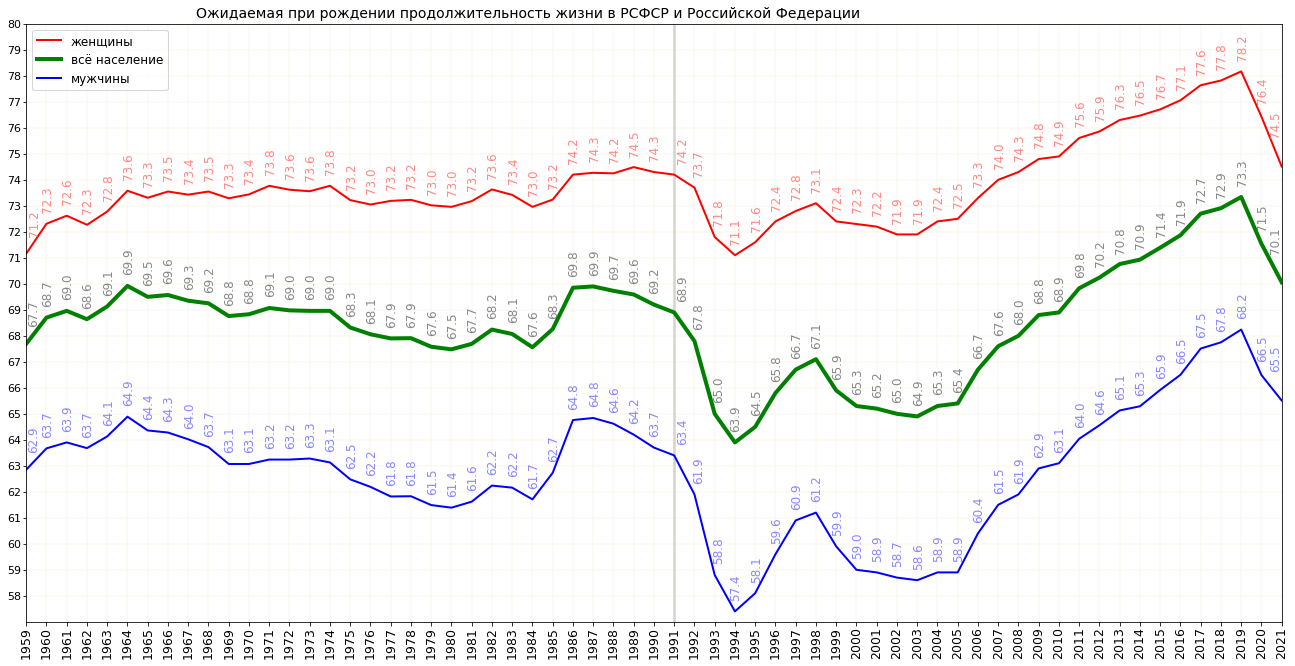

In [13]:
def create_chart_annotated_rsfsr(df, figure_size=(22.5, 11), title='title', hor_lines=HOR_LINES,
                                 lang='en', destination=DESTINATION_OUTPUT, file_name='chart.png'):
    plt.rcParams['figure.figsize'] = figure_size
    
    # set where ticks and labels will be shown around charts
    plt.tick_params(axis='y', which='both', pad=1.5)
    plt.tick_params(axis='x', which='both', pad=1.5)
    
    year_min = df.index[0]
    year_max = df.index[-1]

    plt.title(title, fontsize=14)

    plt.xlim(year_min, year_max)
    plt.grid(color='wheat', linewidth=0.25)

    labels_x = range(year_min, year_max+1)
    labels_y = range(58, 81)
    plt.ylim(57, 80)
    plt.xticks(labels_x, fontsize=12.5, rotation='vertical')
    plt.yticks(labels_y, fontsize=11)
    
    plt.axvline(x=1991, color='lightgrey', linewidth=2.5, zorder=0)
    
    for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                            ['red', 'green', 'blue'],
                                                            ['#FF6060', '#606060',  '#6060FF'],
                                                            [2, 4, 2]):
        plt.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width,
                 label=dd_eng_to_rus[row_name] if lang=='ru' else row_name)
        for x,y in zip(df.index, df[row_name]):
            label = "{:.1f}".format(y)
            plt.annotate(label, # this is the text
                         (x+0.07,y+0.4) if x==year_min
                             else (x+0.4,y+0.15) if x==1991
                             else (x+0.2,y+0.15) if x in [1992, 1993]
                             else (x+0.05,y+0.25) if x==2020
                             else (x,y+0.85) if x==year_max
                             else (x+0.05,y+0.15), # these are the coordinates to position the label
                         textcoords="offset points",                                                          # how to position the text
                         xytext=(0,10),                                                                       # distance from text to points (x,y)
                         ha='left' if (x==year_min) else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                         color=color_text,
                         alpha=0.75,
                         rotation=90,
                         fontsize=12)        

    plt.legend(loc='upper left', fontsize=12)
    
    output_graph(plt, destination=destination, file_name=file_name)


lang = LANG
if lang == 'ru':
    create_chart_annotated_rsfsr(df, title='Ожидаемая при рождении продолжительность жизни в РСФСР и Российской Федерации                                                        ',
                                 lang='ru', destination=DESTINATION_OUTPUT, file_name='Life expectancy in RSFSR and RF (by Human Mortality Database and Rosstat) -ru.png')
else:
    create_chart_annotated_rsfsr(df, title='Life expectancy at birth in the Russian SFSR and the Russian Federation                       ',
                                 lang='en', destination=DESTINATION_OUTPUT, file_name='Life expectancy in RSFSR and RF (by Human Mortality Database and Rosstat).png')

<br />
<br />
<br />

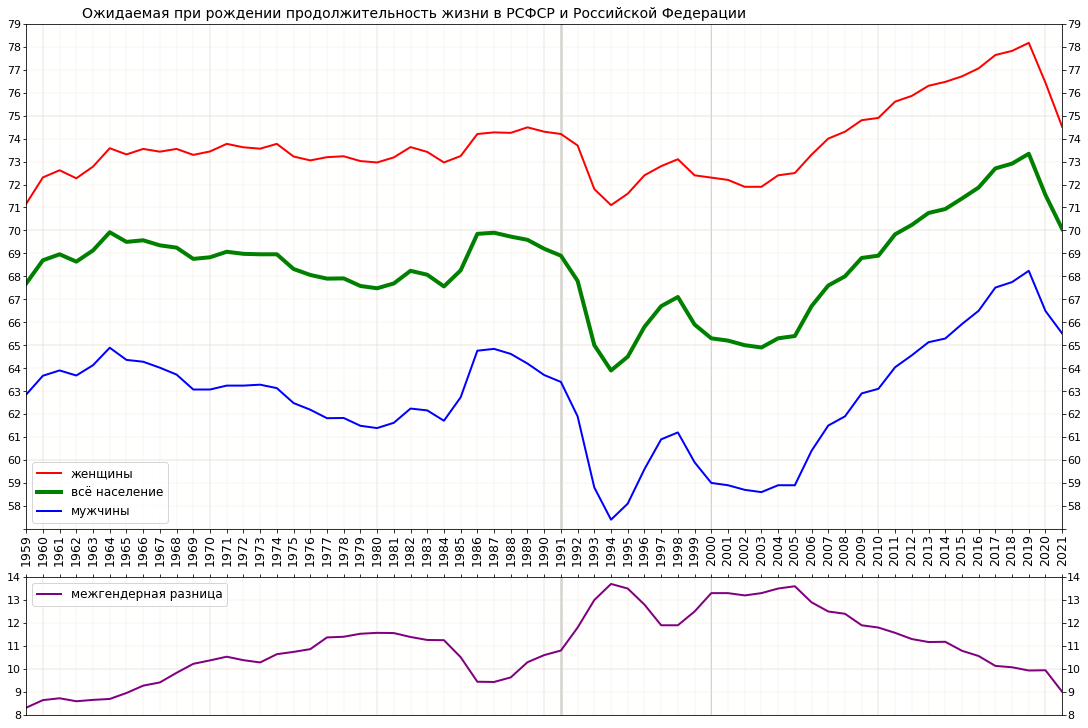

In [14]:
def create_chart_annotated_rsfsr_with_diff_simple(
        df, figure_size=(15, 10), title='title', hor_lines=HOR_LINES,
        lang='en', destination=DESTINATION_OUTPUT, file_name='chart.png'):
    
    plt.rcParams['figure.figsize'] = figure_size
    
    ser_gap = df['females'] - df['males']

    ylim_1_min = math.floor(df.min().min())
    ylim_1_max = math.ceil(df.max().max())
    
    ylim_2_min = math.floor(ser_gap.min())
    ylim_2_max = math.ceil(ser_gap.max())
    
    year_min = df.index[0]
    year_max = df.index[-1]
    
    # set chart areas, their locations, sizes and appearances
    fig, (ax1, ax2) = plt.subplots(nrows=2,
                                   gridspec_kw={'height_ratios': [ylim_1_max - ylim_1_min,
                                                                  ylim_2_max - ylim_2_min]},
                                   constrained_layout=True)
    
    # set where ticks and labels will be shown around charts
    ax1.tick_params(axis='x', which='both', top=False, bottom=True, labeltop=False, labelbottom=True, pad=1.5)
    ax1.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)
    ax2.tick_params(axis='x', which='both', top=True, bottom=False, labeltop=False, labelbottom=False, pad=1.5)
    ax2.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=True, pad=1.5)

    # set limits of chart axes
    ax1.set_xlim(year_min, year_max)
    ax2.set_xlim(year_min, year_max)
    ax1.set_ylim(ylim_1_min, ylim_1_max)
    ax2.set_ylim(ylim_2_min, ylim_2_max)

    # set ticks and labels
    labels_x = range(year_min, year_max+1)
    ax1.set_xticks(labels_x)
    ax2.set_xticks(labels_x)
    ax1.set_xticklabels(labels_x, fontsize=12.5, rotation='vertical')
    
    labels_y1 = tuple(range(ylim_1_min, ylim_1_max+1))
    ax1.set_yticks(labels_y1)
    ax1.set_yticklabels(('',) + labels_y1[1:], fontsize=11)
    labels_y2 = tuple(range(ylim_2_min, ylim_2_max+1))
    ax2.set_yticks(labels_y2)
    ax2.set_yticklabels(labels_y2, fontsize=11)

    # settings grids
    ax1.grid(color='wheat', linewidth=0.25)
    ax2.grid(color='wheat', linewidth=0.25)
    
    for age in range(ylim_1_min - ylim_1_min % 5 + 5, ylim_1_max, 5):
        ax1.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)
    
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        ax1.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)
        ax2.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)

    ax1.axvline(x=1991, color='lightgrey', linewidth=2.5, alpha=1, zorder=0)
    ax2.axvline(x=1991, color='lightgrey', linewidth=2.5, alpha=1, zorder=0)
    ax1.axvline(x=2000, color='lightgrey', linewidth=1, zorder=0)
    ax2.axvline(x=2000, color='lightgrey', linewidth=1, zorder=0)
    
    for year in hor_lines:
        ax1.axvline(x=year, color='wheat', linewidth=2, alpha=0.5, zorder=0)
        ax2.axvline(x=year, color='wheat', linewidth=2, alpha=0.5, zorder=0)

    for yd in range(ylim_2_min - ylim_2_min % 5 + 5, ylim_2_max, 5):
        ax2.axhline(y=yd, color='lightgrey', linewidth=0.4, zorder=0)

    # set title
    ax1.set_title(label=title, fontsize=14)


    #———  setting for chart 1  ———
    for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                            ['red', 'green', 'blue'],
                                                            ['#FF6060', '#606060',  '#6060FF'],
                                                            [2, 4, 2]):
        ax1.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width,
                 label=dd_eng_to_rus[row_name] if lang=='ru' else row_name)

    ax1.legend(loc='lower left', fontsize=12)


    #———  setting for chart 2  ———
    ax2.plot(ser_gap, color='purple', linewidth=2, label='межгендерная разница' if lang=='ru' else 'gender gap')

    ax2.legend(loc='upper left', fontsize=12)
   
    output_graph(plt, destination=destination, file_name=file_name)


lang = LANG
hor_lines = []
if lang == 'ru':
    create_chart_annotated_rsfsr_with_diff_simple(
        df, title='Ожидаемая при рождении продолжительность жизни в РСФСР и Российской Федерации                                                          ',
        hor_lines=hor_lines, lang='ru', destination=DESTINATION_OUTPUT,
        file_name='Life expectancy in RSFSR and RF (by Human Mortality Database and Rosstat) -diff_simple -ru.png')
else:
    create_chart_annotated_rsfsr_with_diff_simple(
        df, title='Life expectancy at birth in the Russian SFSR and the Russian Federation                         ',
        hor_lines=hor_lines, lang='en', destination=DESTINATION_OUTPUT,
        file_name='Life expectancy in RSFSR and RF (by Human Mortality Database and Rosstat) -diff_simple.png')

<br />
<br />
<br />

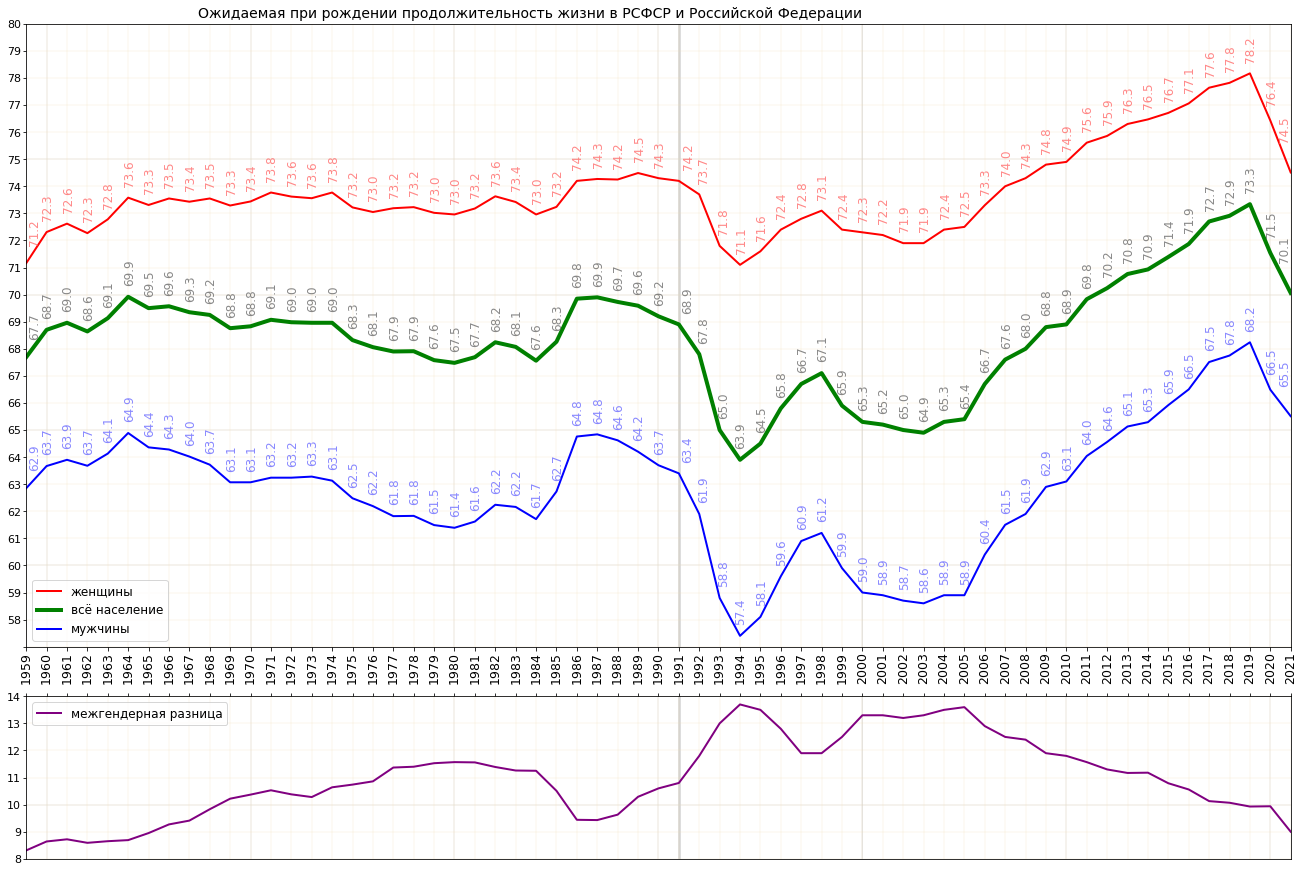

In [15]:
def create_chart_annotated_rsfsr_with_diff(
        df, figure_size=(18, 12), title='title', hor_lines=HOR_LINES,
        lang='en', destination=DESTINATION_OUTPUT, file_name='chart.png'):
    
    plt.rcParams['figure.figsize'] = figure_size
    
    ser_gap = df['females'] - df['males']

    ylim_1_min = math.floor(df.min().min())
    ylim_1_max = math.ceil(df.max().max() + 1)
    
    ylim_2_min = math.floor(ser_gap.min())
    ylim_2_max = math.ceil(ser_gap.max())
    
    year_min = df.index[0]
    year_max = df.index[-1]
    
    # set chart areas, their locations, sizes and appearances
    fig, (ax1, ax2) = plt.subplots(nrows=2,
                                   gridspec_kw={'height_ratios': [ylim_1_max - ylim_1_min,
                                                                  ylim_2_max - ylim_2_min]},
                                   constrained_layout=True)
    
    # set where ticks and labels will be shown around charts
    ax1.tick_params(axis='x', which='both', top=False, bottom=True, labeltop=False, labelbottom=True, pad=1.5)
    ax1.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=1.5)
    ax2.tick_params(axis='x', which='both', top=True, bottom=False, labeltop=False, labelbottom=False, pad=1.5)
    ax2.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=1.5)

    # set limits of chart axes
    ax1.set_xlim(year_min, year_max)
    ax2.set_xlim(year_min, year_max)
    ax1.set_ylim(ylim_1_min, ylim_1_max)
    ax2.set_ylim(ylim_2_min, ylim_2_max)

    # set ticks and labels
    labels_x = range(year_min, year_max+1)
    ax1.set_xticks(labels_x)
    ax2.set_xticks(labels_x)
    ax1.set_xticklabels(labels_x, fontsize=12.5, rotation='vertical')
    
    labels_y1 = tuple(range(ylim_1_min, ylim_1_max+1))
    ax1.set_yticks(labels_y1)
    ax1.set_yticklabels(('',) + labels_y1[1:], fontsize=11)
    labels_y2 = tuple(range(ylim_2_min, ylim_2_max+1))
    ax2.set_yticks(labels_y2)
    ax2.set_yticklabels(labels_y2, fontsize=11)

    # settings grids
    ax1.grid(color='wheat', linewidth=0.25)
    ax2.grid(color='wheat', linewidth=0.25)
    
    for age in range(ylim_1_min - ylim_1_min % 5 + 5, ylim_1_max, 5):
        ax1.axhline(y=age, color='lightgrey', linewidth=0.4, zorder=0)
    
    for year in range(year_min - year_min % 10 + 10, year_max, 10):
        ax1.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)
        ax2.axvline(x=year, color='lightgrey', linewidth=0.4, zorder=0)

    ax1.axvline(x=1991, color='lightgrey', linewidth=2.5, alpha=1, zorder=0)
    ax2.axvline(x=1991, color='lightgrey', linewidth=2.5, alpha=1, zorder=0)
    ax1.axvline(x=2000, color='lightgrey', linewidth=1, alpha=0.5, zorder=0)
    ax2.axvline(x=2000, color='lightgrey', linewidth=1, alpha=0.5, zorder=0)
    
    for year in hor_lines:
        ax1.axvline(x=year, color='wheat', linewidth=2, alpha=0.5, zorder=0)
        ax2.axvline(x=year, color='wheat', linewidth=2, alpha=0.5, zorder=0)

    for yd in range(ylim_2_min - ylim_2_min % 5 + 5, ylim_2_max, 5):
        ax2.axhline(y=yd, color='lightgrey', linewidth=0.4, zorder=0)

    # set title
    ax1.set_title(label=title, fontsize=14)


    #———  setting for chart 1  ———
    for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                            ['red', 'green', 'blue'],
                                                            ['#FF6060', '#606060',  '#6060FF'],
                                                            [2, 4, 2]):
        ax1.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width,
                 label=dd_eng_to_rus[row_name] if lang=='ru' else row_name)
        for x,y in zip(df.index, df[row_name]):
            label = "{:.1f}".format(y)
            ax1.annotate(label, # this is the text
                         (x+0.07,y+0.4) if x==year_min
                             else (x+0.45,y+0.15) if x==1991
                             else (x+0.2,y+0.15) if x in [1992, 1993]
                             else (x+0.05,y+0.3) if x==2020
                             else (x,y+0.85) if x==year_max
                             else (x+0.05,y+0.15), # these are the coordinates to position the label
                         textcoords="offset points",                                                          # how to position the text
                         xytext=(0,10),                                                                       # distance from text to points (x,y)
                         ha='left' if (x==year_min) else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                         color=color_text,
                         alpha=0.75,
                         rotation=90,
                         fontsize=12)
        
        
    ax1.legend(loc='lower left', fontsize=12)


    #———  setting for chart 2  ———
    ax2.plot(ser_gap, color='purple', linewidth=2, label='межгендерная разница' if lang=='ru' else 'gender gap')

    ax2.legend(loc='upper left', fontsize=12)
   
    output_graph(plt, destination=destination, file_name=file_name)


lang = LANG
hor_lines = []
if lang == 'ru':
    create_chart_annotated_rsfsr_with_diff(
        df, title='Ожидаемая при рождении продолжительность жизни в РСФСР и Российской Федерации                                                         ',
        hor_lines=hor_lines, lang='ru', destination=DESTINATION_OUTPUT,
        file_name='Life expectancy in RSFSR and RF (by Human Mortality Database and Rosstat) -diff -ru.png')
else:
    create_chart_annotated_rsfsr_with_diff(
        df, title='Life expectancy at birth in the Russian SFSR and the Russian Federation                       ',
        hor_lines=hor_lines, lang='en', destination=DESTINATION_OUTPUT,
        file_name='Life expectancy in RSFSR and RF (by Human Mortality Database and Rosstat) -diff.png')

<br />
<br />
<br />

In [16]:
def place_text(plt, x, y, s, fs=16):
    plt.text(x=x-0.3, y=y-0.2, s=s, verticalalignment='top', fontsize=fs, color='dimgray')

In [17]:
AnnotationNote = namedtuple('AnnotationNote', ['year', 'height', 'text_en', 'text_ru', 'fs'],  # fs - font_size
                            defaults=(2000, 80, 'name', 'имя', 15))

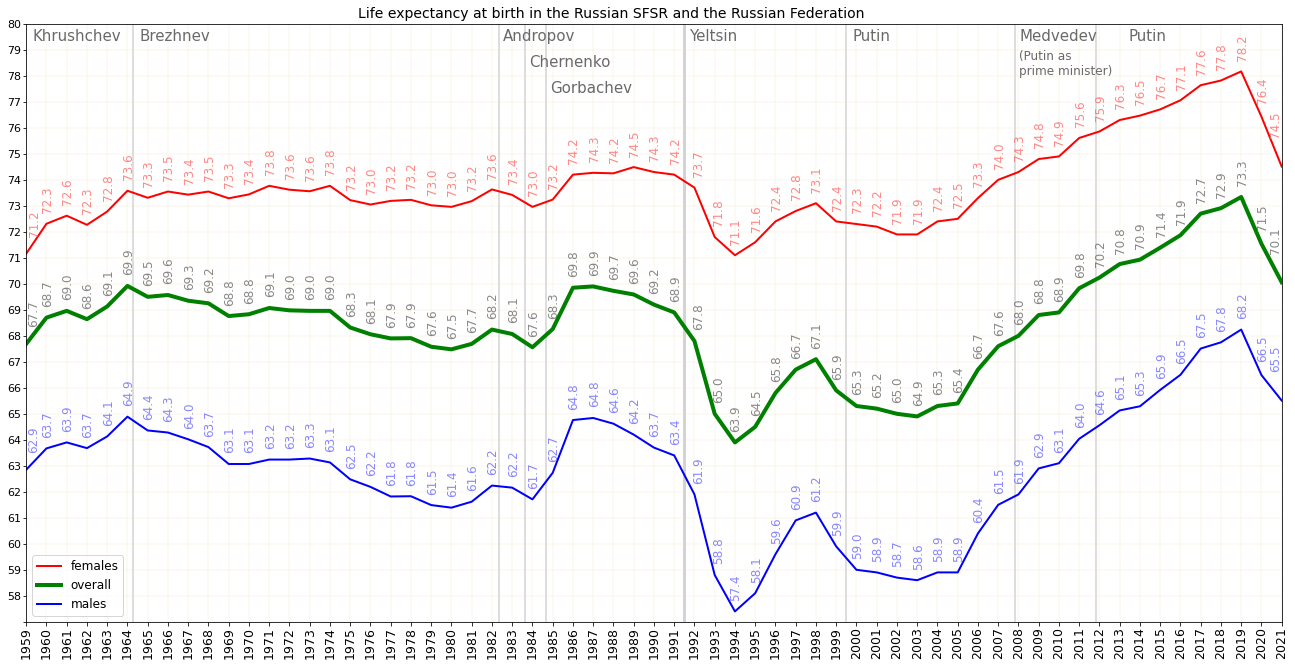

In [24]:
def create_chart_annotated_rsfsr_with_leader(
        df, figure_size=(22.5, 11), title='title', hor_lines=[], annotations=[],
        lang='en', destination=DESTINATION_OUTPUT, file_name='chart.png'):
    
    plt.rcParams['figure.figsize'] = figure_size
    
    # set where ticks and labels will be shown around charts
    plt.tick_params(axis='y', which='both', pad=1.5)
    plt.tick_params(axis='x', which='both', pad=1.5)
    
    year_min = df.index[0]
    year_max = df.index[-1]

    plt.title(title, fontsize=14)
        
    plt.xlim(year_min, year_max)
    plt.grid(color='wheat', linewidth=0.25)

    labels_x = range(year_min, year_max+1)
    labels_y = tuple(range(57, 81))
    plt.ylim(57, 80)
    plt.xticks(labels_x, fontsize=12.5, rotation='vertical')
    plt.yticks(ticks=labels_y, labels=('',)+labels_y[1:], fontsize=11)    
    
    plt.axvline(x=1991.98082-0.5, color='lightgrey', linewidth=3, zorder=0)
    for year in hor_lines:
        plt.axvline(x=year-0.5, color='lightgrey', linewidth=1.5, zorder=0)
        
    for annotation in annotations:
        place_text(plt, annotation.year, annotation.height, annotation.text_ru if lang=='ru' else annotation.text_en, annotation.fs)
    
    for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                            ['red', 'green', 'blue'],
                                                            ['#FF6060', '#606060',  '#6060FF'],
                                                            [2, 4, 2]):
        plt.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width,
                 label=dd_eng_to_rus[row_name] if lang=='ru' else row_name)
        for x,y in zip(df.index, df[row_name]):
            label = "{:.1f}".format(y)
            plt.annotate(label, # this is the text
                         (x+0.07,y+0.4) if x==year_min
                             # else (x+0.4,y+0.15) if x==1991
                             else (x+0.2,y+0.15) if x in [1992, 1993]
                             else (x+0.05,y+0.25) if x==2020
                             else (x,y+0.85) if x==year_max
                             else (x+0.05,y+0.15), # these are the coordinates to position the label
                         textcoords="offset points",                                                          # how to position the text
                         xytext=(0,10),                                                                       # distance from text to points (x,y)
                         ha='left' if (x==year_min) else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                         color=color_text,
                         alpha=0.75,
                         rotation=90,
                         fontsize=12)
    
    plt.legend(loc='lower left', fontsize=12)
    
    output_graph(plt, destination=destination, file_name=file_name)
    

hor_lines = [1964.78415, 1982.86301, 1984.11749, 1985.18904, 1991.98082, 2000, 2008.34699, 2012.34699]

annotations = [
    AnnotationNote(year=1959.6, height=80, text_en='Khrushchev', text_ru='Хрущёв'),
    AnnotationNote(year=1964.78415+0.1, height=80, text_en='Brezhnev', text_ru='Брежнев'),
    AnnotationNote(year=1982.86301, height=80, text_en='Andropov', text_ru='Андропов'), # 1982.77808
    AnnotationNote(year=1984.11749, height=79, text_en='Chernenko', text_ru='Черненко'),
    AnnotationNote(year=1985.18904, height=78, text_en='Gorbachev', text_ru='Горбачёв'),
    AnnotationNote(year=1991.98082+0.1, height=80, text_en='Yeltsin', text_ru='Ельцин'),
    AnnotationNote(year=2000+0.1, height=80, text_en='Putin', text_ru='Путин'),
    AnnotationNote(year=2008.34699, height=80, text_en='Medvedev', text_ru='Медведев'),
    AnnotationNote(year=2008.34699, height=79.2, text_en='(Putin as\nprime minister)', text_ru='(Путин как\nпремьер-министр)', fs=12),
    AnnotationNote(year=2013.75, height=80, text_en='Putin', text_ru='Путин')
]

LANG = 'en'
lang = LANG
if lang == 'ru':
    create_chart_annotated_rsfsr_with_leader(
        df, title='Ожидаемая при рождении продолжительность жизни в РСФСР и Российской Федерации                                                     ',
        hor_lines=hor_lines, annotations=annotations, lang='ru', destination=DESTINATION_OUTPUT,
        file_name='Life expectancy in RSFSR and RF vs leader -ru.png')
else:
    create_chart_annotated_rsfsr_with_leader(
        df, title='Life expectancy at birth in the Russian SFSR and the Russian Federation                   ',
        hor_lines=hor_lines, annotations=annotations, lang='en', destination=DESTINATION_OUTPUT,
        file_name='Life expectancy in RSFSR and RF vs leader.png')

<br />
<br />
<br />

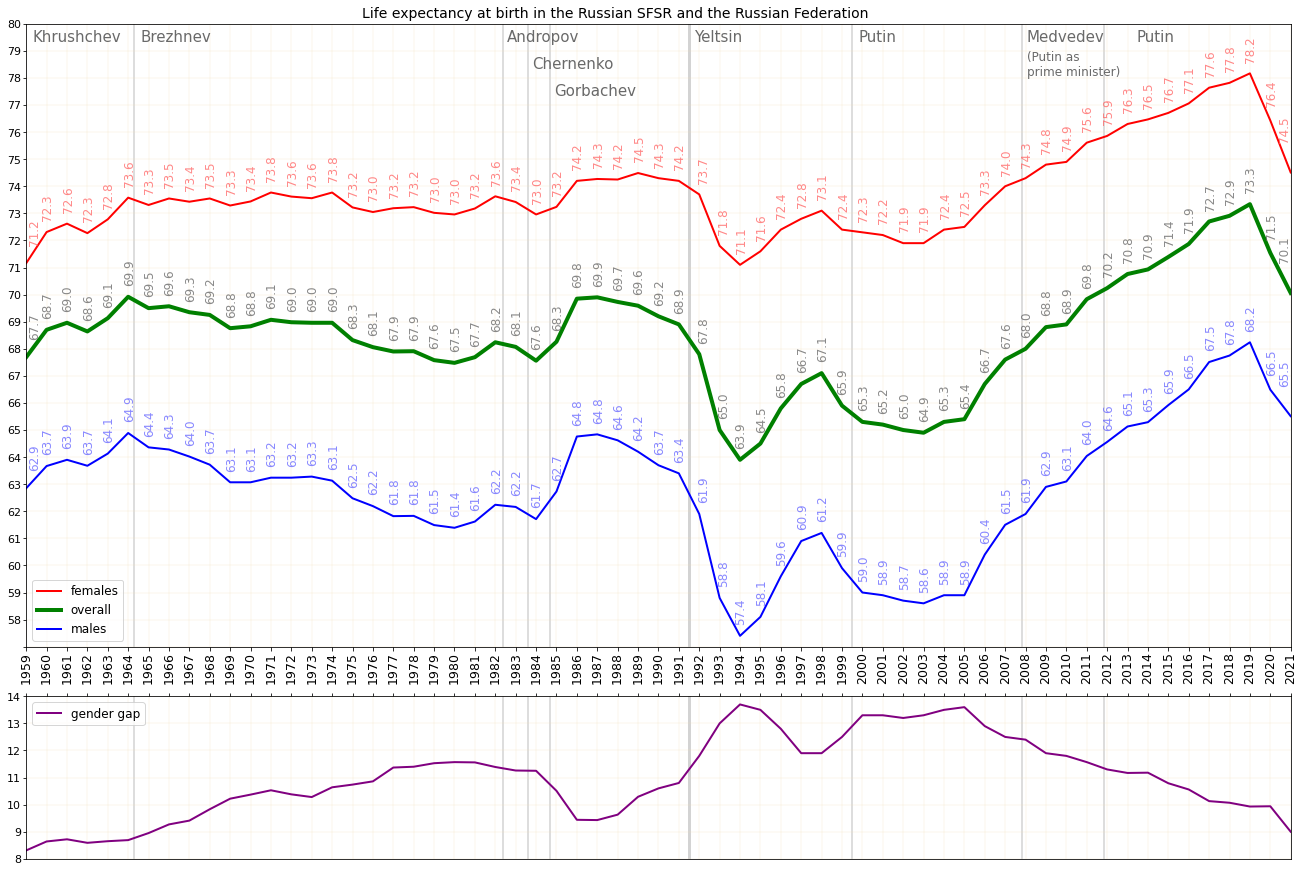

In [25]:
def create_chart_annotated_rsfsr_with_leader_diff(
        df, figure_size=(18, 12), title='title', hor_lines=[], annotations=[],
        lang='en', destination=DESTINATION_OUTPUT, file_name='chart.png'):

    plt.rcParams['figure.figsize'] = figure_size
    
    ser_gap = df['females'] - df['males']

    ylim_1_min = math.floor(df.min().min())
    ylim_1_max = math.ceil(df.max().max() + 1)
    
    ylim_2_min = math.floor(ser_gap.min())
    ylim_2_max = math.ceil(ser_gap.max())
    
    year_min = df.index[0]
    year_max = df.index[-1]
    
    # set chart areas, their locations, sizes and appearances
    fig, (ax1, ax2) = plt.subplots(nrows=2,
                                   gridspec_kw={'height_ratios': [ylim_1_max - ylim_1_min,
                                                                  ylim_2_max - ylim_2_min]},
                                   constrained_layout=True)
    
    # set where ticks and labels will be shown around charts
    ax1.tick_params(axis='x', which='both', top=False, bottom=True, labeltop=False, labelbottom=True, pad=1.5)
    ax1.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=1.5)
    ax2.tick_params(axis='x', which='both', top=True, bottom=False, labeltop=False, labelbottom=False, pad=1.5)
    ax2.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=1.5)

    # set limits of chart axes
    ax1.set_xlim(year_min, year_max)
    ax2.set_xlim(year_min, year_max)
    ax1.set_ylim(ylim_1_min, ylim_1_max)
    ax2.set_ylim(ylim_2_min, ylim_2_max)

    # set ticks and labels
    labels_x = range(year_min, year_max+1)
    ax1.set_xticks(labels_x)
    ax2.set_xticks(labels_x)
    ax1.set_xticklabels(labels_x, fontsize=12.5, rotation='vertical')
    
    labels_y1 = tuple(range(ylim_1_min, ylim_1_max+1))
    ax1.set_yticks(labels_y1)
    ax1.set_yticklabels(('',) + labels_y1[1:], fontsize=11)
    labels_y2 = tuple(range(ylim_2_min, ylim_2_max+1))
    ax2.set_yticks(labels_y2)
    ax2.set_yticklabels(labels_y2, fontsize=11)

    # settings grids
    ax1.grid(color='wheat', linewidth=0.25)
    ax2.grid(color='wheat', linewidth=0.25)

    # set title
    ax1.set_title(label=title, fontsize=14)

    ax1.axvline(x=1991.98082-0.5, color='lightgrey', linewidth=3, zorder=0)
    ax2.axvline(x=1991.98082-0.5, color='lightgrey', linewidth=3, zorder=0)
    
    for year in hor_lines:
        ax1.axvline(x=year-0.5, color='lightgrey', linewidth=1.5, zorder=0)
        ax2.axvline(x=year-0.5, color='lightgrey', linewidth=1.5, zorder=0)
    
    
    #———  setting for chart 1  ———
    for annotation in annotations:
        place_text(ax1, annotation.year, annotation.height, annotation.text_ru if lang=='ru' else annotation.text_en, annotation.fs)
    
    for row_name, color_line, color_text, line_width in zip(['females', 'overall', 'males'],
                                                            ['red', 'green', 'blue'],
                                                            ['#FF6060', '#606060',  '#6060FF'],
                                                            [2, 4, 2]):
        ax1.plot(df.index, df[row_name], linestyle='-', color=color_line, linewidth=line_width,
                 label=dd_eng_to_rus[row_name] if lang=='ru' else row_name)
        for x,y in zip(df.index, df[row_name]):
            label = "{:.1f}".format(y)
            ax1.annotate(label, # this is the text
                         (x+0.07,y+0.4) if x==year_min
                             # else (x+0.4,y+0.15) if x==1991
                             else (x+0.2,y+0.15) if x in [1992, 1993]
                             else (x+0.05,y+0.25) if x==2020
                             else (x,y+0.85) if x==year_max
                             else (x+0.05,y+0.15), # these are the coordinates to position the label
                         textcoords="offset points",                                                          # how to position the text
                         xytext=(0,10),                                                                       # distance from text to points (x,y)
                         ha='left' if (x==year_min) else 'right' if x==year_max else 'center', # horizontal alignment can be left, right or center
                         color=color_text,
                         alpha=0.75,
                         rotation=90,
                         fontsize=12)
        
    ax1.legend(loc='lower left', fontsize=12)


    #———  setting for chart 2  ———
    ax2.plot(ser_gap, color='purple', linewidth=2, label='межгендерная разница' if lang=='ru' else 'gender gap')

    ax2.legend(loc='upper left', fontsize=12)
   
    output_graph(plt, destination=destination, file_name=file_name)

    
lang = LANG
if lang == 'ru':
    create_chart_annotated_rsfsr_with_leader_diff(
        df, title='Ожидаемая при рождении продолжительность жизни в РСФСР и Российской Федерации                                                     ',
        hor_lines=hor_lines, annotations=annotations, lang='ru', destination=DESTINATION_OUTPUT,
        file_name='Life expectancy in RSFSR and RF vs leader -diff -ru.png')
else:
    create_chart_annotated_rsfsr_with_leader_diff(
        df, title='Life expectancy at birth in the Russian SFSR and the Russian Federation                   ',
        hor_lines=hor_lines, annotations=annotations, lang='en', destination=DESTINATION_OUTPUT,
        file_name='Life expectancy in RSFSR and RF vs leader -diff.png')

<br />
<br />
<br />

<b>1979 декабрь 25 – 1989 февраль 15</b> — период Афганской войны с участием СССР<br />
<b>1985 – 1987</b> — антиалкогольная компания в СССР (началась через 2 месяца после прихода к власти Горбачёва)<br />
<b>1991</b> — распад СССР (18-21 августа - Августовский путч, 8 декабря - Беловежские соглашения)<br />
<b>1994 декабрь 9 – 1996 август 31</b> — Первая чеченская война<br />
<b>1998</b> — дефолт<br />
<b>1999 август 7 – 2009 апрель 16</b> — Вторая чеченская война, включая её "партизанскую часть"<br />
<b>2014</b> — Крым входит в состав России, на Россию накладываются множественные санкции<br />
<b>2019</b> — пандемия COVID-19

In [20]:
# # sizes used for creation of charts
# create_chart_annotated_rsfsr_with_diff_simple
#     figure_size=(15, 10)
#     ax1.set_xticklabels(labels_x, fontsize=12.5, rotation='vertical')
#     x2.set_yticklabels(labels_y2, fontsize=11)

# create_chart_annotated_rsfsr_with_diff
#     figure_size=(18, 12)
#     ax1.set_xticklabels(labels_x, fontsize=12.5, rotation='vertical')
#     ax2.set_yticklabels(labels_y2, fontsize=11)
    

# create_chart_annotated_rsfsr_with_leader_diff
#     figure_size=(18, 12)
#     ax1.set_xticklabels(labels_x, fontsize=12.5, rotation='vertical')
#     ax2.set_yticklabels(labels_y2, fontsize=11)



# create_chart_annotated_rsfsr
#     figure_size=(22.5, 11)
#     plt.xticks(labels_x, fontsize=12.5, rotation='vertical')
#     plt.yticks(labels_y, fontsize=11)
    
# create_chart_annotated_rsfsr_with_leader
#     figure_size=(22.5, 11)
#     plt.xticks(labels_x, fontsize=12.5, rotation='vertical')
#     plt.yticks(ticks=labels_y, labels=('',)+labels_y[1:], fontsize=11)

<br />
<br />
<br />

In [41]:
# just for interest, epxlore interval of dates
# pd.concat([df.loc[:, 'females'],
#            df.loc[:, 'overall'],
#            df.loc[:, 'males'],
#            df.loc[:, 'females'] - df.loc[:, 'males']], axis='columns') \
#   .rename(columns={0: 'gender_gap'}) \
#   .loc[1980:1991]